# How to execute large jobs?: Using Batch Job

Most of the simple, basic openEO usage examples show synchronous downloading of results: you submit a process graph with a (HTTP POST) request and receive the result as direct response of that same request. This only works properly if the processing doesn’t take too long (order of seconds, or a couple of minutes at most).

For the heavier work (larger regions of interest, larger time series, more intensive processing, …) you have to use batch jobs.

This notebook shows how to programmatically create and interact with batch job using the openEO Python client library.

In [2]:
import openeo

# connect to the backend and authenticate
connection = openeo.connect(url="openeo-staging.creo.vito.be")
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo-staging.creo.vito.be/openeo/1.1/' with OidcBearerAuth>

In [3]:
# load your data collection
cube = connection.load_collection(
                "SENTINEL2_L2A",
                bands=["B04", "B03", "B02"],
                temporal_extent=("2022-05-01", "2022-05-30"),
                spatial_extent={
                    "west": 3.202609,
                    "south": 51.189474,
                    "east": 3.254708,
                    "north": 51.204641,
                    "crs": "EPSG:4326",
    },
    max_cloud_cover=50,
)

cube = cube.max_time()

In [4]:
# Store raster data as GeoTIFF files
cube = cube.save_result(format="GTiff")

While not necessary, it is also recommended to give your batch job a descriptive title so it’s easier to identify in your job listing.

In [4]:
job = cube.execute_batch()

0:00:00 Job 'j-e6e8567c637443298bca57e2cfda0e3f': send 'start'
0:00:11 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:00:16 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:00:23 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:00:31 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:00:41 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:00:53 Job 'j-e6e8567c637443298bca57e2cfda0e3f': queued (progress N/A)
0:01:08 Job 'j-e6e8567c637443298bca57e2cfda0e3f': finished (progress N/A)


An additional but longer way of executing the job is following a couple of steps starting with creating it using `create_job()` then starting it with either `start_job()` or using `start_and_wait()`. 

A batch job on a back-end is fully identified by its job_id.

In [5]:
job.job_id

'j-e6e8567c637443298bca57e2cfda0e3f'

Depending on your situation or use case: make sure to properly take note of the batch job id. It allows you to “reconnect” to your job on the back-end, even if it was created at another time, by another script/notebook or even with another openEO client. Then you can later use use `Connection.job("your job id")` to create a BatchJob object for an existing batch job.

A batch job typically takes some time to finish, and you can check its status with the `status()` method.

In [6]:
job.status()

'finished'

Batch job logs can be fetched with `job.logs()`. If you prefer a graphical, web-based interactive environment to manage and monitor your batch jobs, feel free to switch to an openEO web editor like [editor.openeo.org](https://editor.openeo.org/) at any time.

In [7]:
job.logs()

[{'id': '[1684136100733, 420060]',
  'time': '2023-05-15T07:35:00.733Z',
  'level': 'info',
  'message': "Starting job 'j-e6e8567c637443298bca57e2cfda0e3f' from user User('3e24e251-2e9a-438f-90a9-d4500e576574', {'oidc_userinfo': {'sub': '3e24e251-2e9a-438f-90a9-d4500e576574', 'email_verified': True, 'name': 'Pratichhya Sharma', 'preferred_username': 'pratichhya.sharma@vito.be', 'given_name': 'Pratichhya', 'family_name': 'Sharma', 'email': 'pratichhya.sharma@vito.be'}}) (proxy user None)"},
 {'id': '[1684136100843, 421564]',
  'time': '2023-05-15T07:35:00.843Z',
  'level': 'debug',
  'message': 'job_options: {}'},
 {'id': '[1684136101653, 435020]',
  'time': '2023-05-15T07:35:01.653Z',
  'level': 'info',
  'message': "Dry run extracted these source constraints: [(('load_collection', ('SENTINEL2_L2A', (('eo:cloud_cover', (('lte', 50),)), ('productType', (('eq', 'L2A'),))))), {'temporal_extent': ('2022-05-01', '2022-05-30'), 'spatial_extent': {'west': 3.202609, 'south': 51.189474, 'east': 3.254708, 'north': 51.204641, 'crs': 'EPSG:4326'}, 'bands': ['B04', 'B03', 'B02'], 'process_type': [<ProcessType.GLOBAL_TIME: 4>], 'properties': {'productType': {'process_graph': {'asc': {'process_id': 'eq', 'arguments': {'x': {'from_parameter': 'value'}, 'y': 'L2A'}, 'result': True}}}, 'eo:cloud_cover': {'process_graph': {'lte1': {'process_id': 'lte', 'arguments': {'x': {'from_parameter': 'value'}, 'y': 50}, 'result': True}}}}})]"},
 {'id': '[1684136102412, 436401]',
  'time': '2023-05-15T07:35:02.412Z',
  'level': 'info',
  'message': 'mapped job_id j-e6e8567c637443298bca57e2cfda0e3f to application ID job-e6e8567c63-3e24e251-2e9a-438f-9'},
 {'id': '[1684136104650, 8410]',
  'time': '2023-05-15T07:35:04.650Z',
  'level': 'debug',
  'message': "About to sync status for job_id='j-e6e8567c637443298bca57e2cfda0e3f' user_id='3e24e251-2e9a-438f-90a9-d4500e576574' application_id='job-e6e8567c63-3e24e251-2e9a-438f-9' previous_status='created'"},
 {'id': '[1684136104694, 9182]',
  'time': '2023-05-15T07:35:04.694Z',
  'level': 'error',
  'message': 'Failed to retrieve usage stats from kubecost'},
 {'id': '[1684136104694, 14103]',
  'time': '2023-05-15T07:35:04.694Z',
  'level': 'info',
  'message': 'job j-e6e8567c637443298bca57e2cfda0e3f: status change from created to queued'},
 {'id': '[1684136112358, 4035]',
  'time': '2023-05-15T07:35:12.358Z',
  'level': 'info',
  'message': 'batch_job.py main: start 2023-05-15 07:35:12.353172'},
 {'id': '[1684136112358, 4345]',
  'time': '2023-05-15T07:35:12.358Z',
  'level': 'info',
  'message': "batch_job.py argv: ['/opt/openeo/lib64/python3.8/site-packages/openeogeotrellis/deploy/batch_job.py', '/batch_jobs/j-e6e8567c637443298bca57e2cfda0e3f/job_specification.json', '/batch_jobs/j-e6e8567c637443298bca57e2cfda0e3f', 'out', 'stdout', 'job_metadata.json', '1.1.0', '[]', '3e24e251-2e9a-438f-90a9-d4500e576574', '0.0']"},
 {'id': '[1684136112358, 4933]',
  'time': '2023-05-15T07:35:12.358Z',
  'level': 'info',
  'message': 'batch_job.py pid 69; ppid 15; cwd /opt/spark/work-dir'},
 {'id': '[1684136112562, 5250]',
  'time': '2023-05-15T07:35:12.562Z',
  'level': 'warning',
  'message': "batch_job.py version info {'date': '2023-05-15T07:35:12Z', 'versions': {'openeo': '0.16.0', 'openeo_driver': '0.48.0a1.dev20230510+508', 'openeo-geopyspark': '0.11.0a1.dev20230511+1259'}}"},
 {'id': '[1684136112562, 5704]',
  'time': '2023-05-15T07:35:12.562Z',
  'level': 'info',
  'message': "creating job dir PosixPath('/batch_jobs/j-e6e8567c637443298bca57e2cfda0e3f') (parent dir: {'path': '/batch_jobs', 'mode': 'drwxr-xr-x', 'uid': 18585, 'user': 'spark', 'gid': 18585, 'group': 'spark', 'size': 6}))"},
 {'id': '[1684136112567, 6228]',
  'time': '2023-05-15T07:35:12.567Z',
  'level': 'info',
  'message': 'Using temp dir /opt/spark/work-dir/tmp'},
 {'id': '[1684136112655, 6580]',
  'time': '2023-05-15T07:35:12.655Z',
  'level': 'info',
  'message': "Trying to load 'custom_processes' with PYTHONPATH ['/opt/venv/lib/python3.8/site-packages

Once a batch job is finished you can get a handle to the results (which can be a single file or multiple files) with `get_results()`.

In [10]:
results = job.get_results()

In [15]:
results

<JobResults for job 'j-e6e8567c637443298bca57e2cfda0e3f'>

In the general case, when you have one or more result files (also called “assets”), the easiest option to download them is using `download_files()` (plural) where you just specify a download folder (otherwise the current working directory will be used by default).

In [11]:
results.download_files("output/out")

[WindowsPath('output/out/openEO.tif'),
 WindowsPath('output/out/job-results.json')]

### Visualize the result

In [10]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure

img = rasterio.open("output/out/openEO.tif").read()


def normalizeimg(data):
    data = data.astype(np.float)
    for i in range(data.shape[2]):
        p2, p98 = np.percentile(data[:, :, i], (2, 98))
        data[:, :, i] = exposure.rescale_intensity(data[:, :, i], in_range=(p2, p98))
    return data

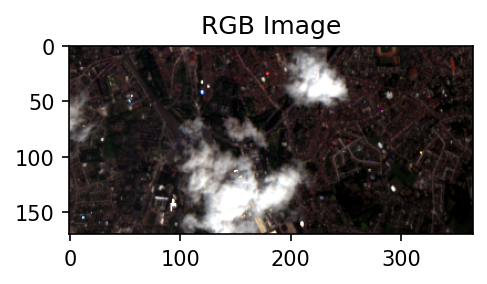

In [11]:
fig, ax = plt.subplots(figsize=(6, 2), dpi=150)
ax.imshow(normalizeimg(np.moveaxis(img, 0, -1)))

ax.set_title("RGB Image")

# Adjusting the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()